# 1. Sequential Model

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [2]:
import tensorflow as tf

2023-03-22 12:44:31.858706: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

In [4]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist

In [5]:
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]

In [6]:
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [7]:
X_train.shape

(55000, 28, 28)

In [8]:
X_train.dtype

dtype('uint8')

In [9]:
X_train, X_valid, X_test = X_train/255., X_valid / 255., X_test / 255.

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [11]:
class_names[y_train[0]]

'Ankle boot'

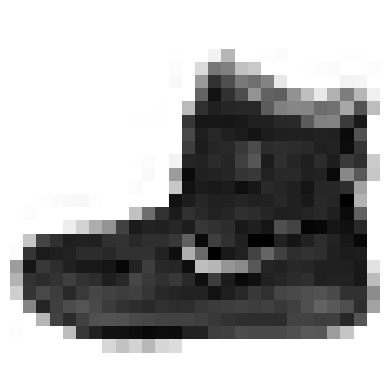

In [12]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

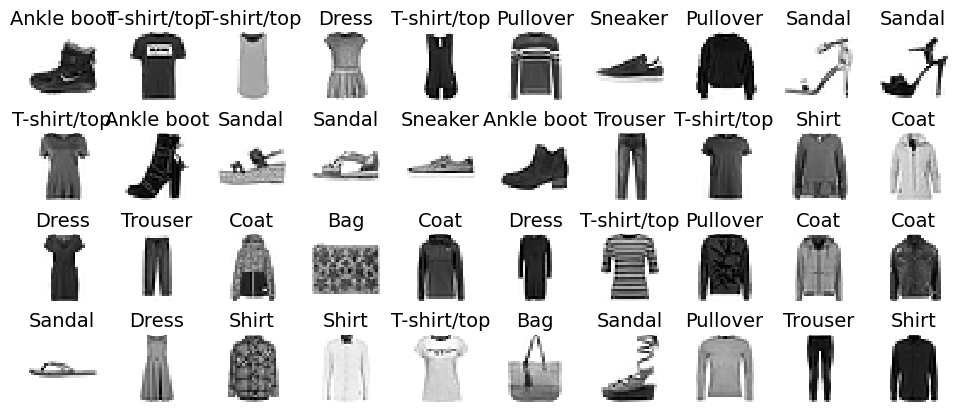

In [13]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

In [14]:
tf.random.set_seed(42)

In [15]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape = [28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation = "relu"))
model.add(tf.keras.layers.Dense(100, activation = "relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

2023-03-22 12:44:39.366634: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-22 12:44:39.366972: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


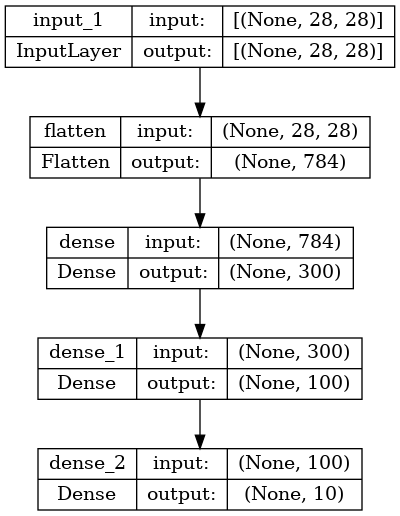

In [17]:
tf.keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)


In [18]:
model.layers

In [19]:
model.get_layer('dense')

In [20]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [21]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.0710391 ,  0.00669546, -0.02927597, ..., -0.01284118,
        -0.05421506,  0.01307844],
       [ 0.05966258,  0.05508614,  0.03872573, ..., -0.02026983,
         0.03530612,  0.05286177],
       [-0.06585827, -0.01588394, -0.04690905, ..., -0.03290782,
        -0.04964263, -0.01320041],
       ...,
       [-0.01510916,  0.01637083, -0.06614586, ...,  0.05804433,
        -0.04481141,  0.01221569],
       [ 0.04737277, -0.00496978,  0.05668172, ..., -0.01581865,
        -0.00107424,  0.05744727],
       [ 0.05772524, -0.06302822,  0.06015354, ...,  0.04442878,
         0.0708082 ,  0.01758962]], dtype=float32)

In [22]:
weights.shape

(784, 300)

In [23]:
biases.shape

(300,)

In [24]:
#compiling the model
model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "sgd",
             metrics = "accuracy")

In [25]:
history = model.fit(X_train, y_train, epochs = 30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.7275 - accuracy: 0.7588 - val_loss: 0.5112 - val_accuracy: 0.8268
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4902 - accuracy: 0.8294 - val_loss: 0.4629 - val_accuracy: 0.8312
Epoch 3/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4434 - accuracy: 0.8445 - val_loss: 0.4265 - val_accuracy: 0.8498
Epoch 4/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4178 - accuracy: 0.8537 - val_loss: 0.4001 - val_accuracy: 0.8590
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3962 - accuracy: 0.8616 - val_loss: 0.3948 - val_accuracy: 0.8584
Epoch 6/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3794 - accuracy: 0.8670 - val_loss: 0.3997 - val_accuracy: 0.8604
Epoch 7/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3671 - accuracy: 0.8696 - val_loss: 0.3737 - val_accu

In [26]:
import pandas as pd

In [31]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

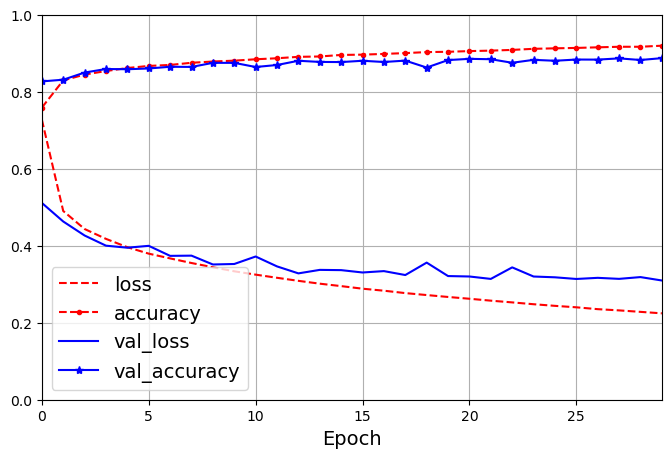

In [27]:
pd.DataFrame(history.history).plot(
figsize = (8,5), xlim = [0,29], ylim = [0,1], grid = True, xlabel= "Epoch",
style = ["r--", "r--.", "b-", "b-*"])
plt.show() #notice validation loss is lower than training loss at the beginning, why?

In [34]:
#evaluation

model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3244 - accuracy: 0.8839


[0.32436615228652954, 0.883899986743927]

In [35]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 13ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [36]:
import numpy as np
y_pred = y_proba.argmax(axis =1 )
y_pred

array([9, 2, 1])

In [37]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [38]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

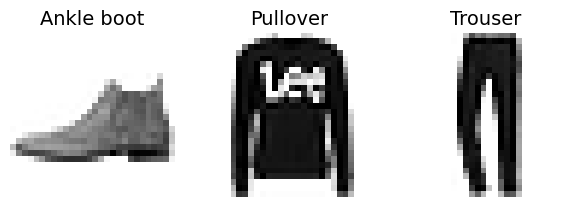

In [39]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Building a Regression MLP using the Sequential API/

In [40]:
from sklearn.datasets import fetch_california_housing

In [43]:
from sklearn.model_selection import train_test_split

In [41]:
housing = fetch_california_housing()

In [44]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42 )
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state = 42)

In [45]:
tf.random.set_seed(42)

In [46]:
norm_layer = tf.keras.layers.Normalization(input_shape = X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation = "relu"),
    tf.keras.layers.Dense(50, activation = "relu"),
    tf.keras.layers.Dense(50, activation = "relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss = "mse", optimizer = optimizer, metrics = ["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs = 20, validation_data = (X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 0.8359 - root_mean_squared_error: 0.9143 - val_loss: 0.4516 - val_root_mean_squared_error: 0.6720
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3841 - root_mean_squared_error: 0.6198 - val_loss: 1.9802 - val_root_mean_squared_error: 1.4072
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3742 - root_mean_squared_error: 0.6117 - val_loss: 0.5816 - val_root_mean_squared_error: 0.7626
Epoch 4/20
363/363 [==============================] - 2s 4ms/step - loss: 0.3402 - root_mean_squared_error: 0.5833 - val_loss: 0.4278 - val_root_mean_squared_error: 0.6540
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3308 - root_mean_squared_error: 0.5752 - val_loss: 0.5967 - val_root_mean_squared_error: 0.7724
Epoch 6/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3237 - root_mean_squared_error: 0.5690 - val_loss: 2.1530 - val_

## Deep and wide model using functional API

In [47]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation = "relu" )
hidden_layer2 = tf.keras.layers.Dense(30, activation = "relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer =tf.keras.layers.Dense(1)

In [49]:
input_ = tf.keras.layers.Input(shape = X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs = [output])

In [50]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss = "mse", optimizer = optimizer, metrics = ["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs = 20, validation_data = (X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 813.3992 - root_mean_squared_error: 28.5202 - val_loss: 15.4923 - val_root_mean_squared_error: 3.9360
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 1.8000 - root_mean_squared_error: 1.3417 - val_loss: 10.8262 - val_root_mean_squared_error: 3.2903
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 1.4938 - root_mean_squared_error: 1.2222 - val_loss: 8.1088 - val_root_mean_squared_error: 2.8476
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 1.2744 - root_mean_squared_error: 1.1289 - val_loss: 4.2370 - val_root_mean_squared_error: 2.0584
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 1.0544 - root_mean_squared_error: 1.0268 - val_loss: 2.0137 - val_root_mean_squared_error: 1.4190
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.8986 - root_mean_squared_error: 0.9480 - val_loss: 1.1275 -

## deep and wide inputs

In [51]:
input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

In [52]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20,
                    validation_data=((X_valid_wide, X_valid_deep), y_valid))
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 1.6727 - root_mean_squared_error: 1.2933 - val_loss: 0.6236 - val_root_mean_squared_error: 0.7897
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5336 - root_mean_squared_error: 0.7305 - val_loss: 1.0762 - val_root_mean_squared_error: 1.0374
Epoch 3/20
363/363 [==============================] - 2s 4ms/step - loss: 0.4700 - root_mean_squared_error: 0.6856 - val_loss: 0.5631 - val_root_mean_squared_error: 0.7504
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4216 - root_mean_squared_error: 0.6493 - val_loss: 0.3926 - val_root_mean_squared_error: 0.6266
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3988 - root_mean_squared_error: 0.6315 - val_loss: 1.2386 - val_root_mean_squared_error: 1.1129
Epoch 6/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3881 - root_mean_squared_error: 0.6230 - val_loss: 2.5287 - val_

### multi-input and auxiliary output

In [53]:
input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)
model = tf.keras.Model(inputs=[input_wide, input_deep],
                       outputs=[output, aux_output])

In [54]:
#each out requires its own loss (keras assumes same for every output if unspecified) and weights
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=("mse", "mse"), loss_weights=(0.9, 0.1), optimizer=optimizer,
              metrics=["RootMeanSquaredError"])

In [55]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid))
)

Epoch 1/20
363/363 [==============================] - 2s 5ms/step - loss: 2.0446 - dense_15_loss: 1.9834 - dense_16_loss: 2.5953 - dense_15_root_mean_squared_error: 1.4083 - dense_16_root_mean_squared_error: 1.6110 - val_loss: 5.3249 - val_dense_15_loss: 4.4740 - val_dense_16_loss: 12.9830 - val_dense_15_root_mean_squared_error: 2.1152 - val_dense_16_root_mean_squared_error: 3.6032
Epoch 2/20
363/363 [==============================] - 2s 4ms/step - loss: 0.7035 - dense_15_loss: 0.6685 - dense_16_loss: 1.0180 - dense_15_root_mean_squared_error: 0.8176 - dense_16_root_mean_squared_error: 1.0089 - val_loss: 2.1118 - val_dense_15_loss: 1.4974 - val_dense_16_loss: 7.6409 - val_dense_15_root_mean_squared_error: 1.2237 - val_dense_16_root_mean_squared_error: 2.7642
Epoch 3/20
363/363 [==============================] - 2s 5ms/step - loss: 0.5491 - dense_15_loss: 0.5320 - dense_16_loss: 0.7034 - dense_15_root_mean_squared_error: 0.7294 - dense_16_root_mean_squared_error: 0.8387 - val_loss: 0.68

In [56]:
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results

162/162 [==============================] - 1s 3ms/step - loss: 0.3359 - dense_15_loss: 0.3292 - dense_16_loss: 0.3960 - dense_15_root_mean_squared_error: 0.5738 - dense_16_root_mean_squared_error: 0.6292


In [57]:
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

1/1 [==============================] - 0s 51ms/step


# Subclassing API for dynamic models

In [58]:
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)  # needed to support naming the model
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)

    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output


In [59]:
model = WideAndDeepModel(30, activation="relu", name="my_cool_model")

In [60]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=optimizer,
              metrics=["RootMeanSquaredError"])
model.norm_layer_wide.adapt(X_train_wide)
model.norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)))
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

Epoch 1/10
363/363 [==============================] - 2s 5ms/step - loss: 1.5822 - output_1_loss: 1.5776 - output_2_loss: 1.6240 - output_1_root_mean_squared_error: 1.2560 - output_2_root_mean_squared_error: 1.2744 - val_loss: 0.9558 - val_output_1_loss: 0.9151 - val_output_2_loss: 1.3217 - val_output_1_root_mean_squared_error: 0.9566 - val_output_2_root_mean_squared_error: 1.1496
Epoch 2/10
363/363 [==============================] - 2s 5ms/step - loss: 0.6423 - output_1_loss: 0.6408 - output_2_loss: 0.6557 - output_1_root_mean_squared_error: 0.8005 - output_2_root_mean_squared_error: 0.8098 - val_loss: 1.1890 - val_output_1_loss: 1.2412 - val_output_2_loss: 0.7197 - val_output_1_root_mean_squared_error: 1.1141 - val_output_2_root_mean_squared_error: 0.8484
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5383 - output_1_loss: 0.5346 - output_2_loss: 0.5711 - output_1_root_mean_squared_error: 0.7312 - output_2_root_mean_squared_error: 0.7557 - val_loss: 0.550

In [62]:
model.save("my_keras_model", save_format="tf")

INFO:tensorflow:Assets written to: my_keras_model/assets


In [64]:
from pathlib import Path

In [67]:
for path in sorted(Path("my_keras_model").glob("**/*")):
    print(path)

my_keras_model/assets
my_keras_model/keras_metadata.pb
my_keras_model/saved_model.pb
my_keras_model/variables
my_keras_model/variables/variables.data-00000-of-00001
my_keras_model/variables/variables.index


In [66]:
model.save_weights("my_weights")